In [1]:
import ipywidgets as widgets
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.widgets import Cursor

%matplotlib ipympl

In [2]:
basemap_check = widgets.Checkbox(False, description="basemap", indent=False)
geology_check = widgets.Checkbox(False, description="geology", indent=False)
faults_check = widgets.Checkbox(False, description="faults", indent=False)
infrastructure_check = widgets.Checkbox(False, description="infrastructure", indent=False)

def on_check(change):
    print("gonna plot changed")

basemap_check.observe(on_check, names="value")
geology_check.observe(on_check, names="value")
faults_check.observe(on_check, names="value")
infrastructure_check.observe(on_check, names="value")

checks = widgets.VBox([basemap_check, geology_check, faults_check, infrastructure_check])
display(checks)

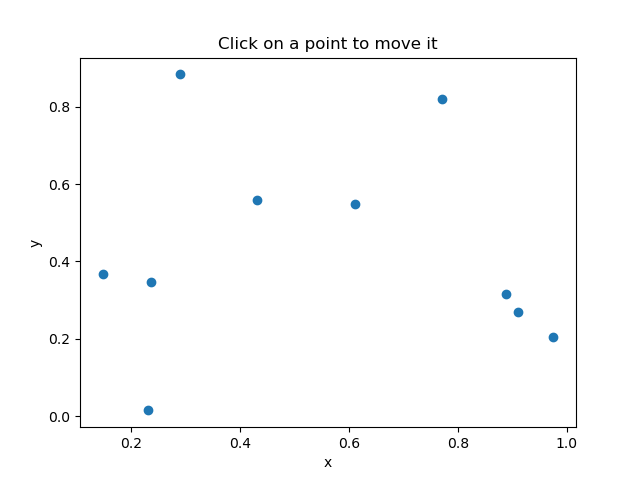

In [3]:
# Create some initial data points
x = np.random.rand(10)
y = np.random.rand(10)

# Define a function to update the plot
def update_plot(event):
    if event.inaxes:
        # Find the closest point
        distances = np.hypot(event.xdata - x, event.ydata - y)
        closest_index = np.argmin(distances)
        
        # Update the point position
        x[closest_index] = event.xdata
        y[closest_index] = event.ydata
        
        # Redraw the plot with updated points
        sc.set_offsets(np.c_[x, y])
        plt.draw()

# Create the initial plot
fig, ax = plt.subplots()
sc = ax.scatter(x, y)
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
plt.title("Click on a point to move it")
plt.xlabel("x")
plt.ylabel("y")

# Connect the event to the update_plot function
fig.canvas.mpl_connect('button_press_event', update_plot)
plt.show()
